# Importing required libraries

In [48]:
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("Breast_cancer_data.csv")

In [7]:
# view of first five rows of df
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
# view of last five rows of df
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
# Print of shape of df
df.shape

(569, 6)

In [6]:
# Print of columns in df
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [10]:
# Print of some of the statastical information of df
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [11]:
# print of information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
# Print of correlation matrix
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [12]:
# checking of null values
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

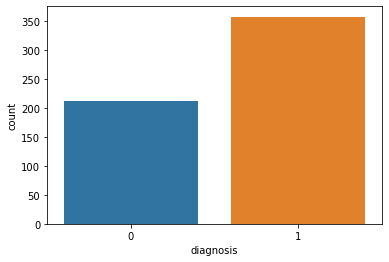

In [14]:
# countplot
sn.countplot(x="diagnosis",data=df)

<AxesSubplot:>

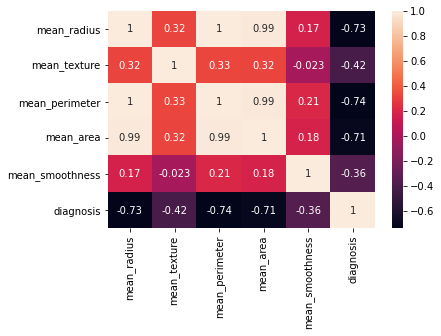

In [18]:
# constructing a heatmap
correlation = df.corr()
sn.heatmap(correlation,annot=True)

Splitting the data into train and test data

In [20]:
X = df.drop(['diagnosis'],axis=1)
Y = df['diagnosis']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Building the model

In [36]:
# Random forest Regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7312133333333333


In [41]:
model=LogisticRegression()

In [42]:
model.fit(X_train,Y_train)

C:\Users\deept\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
x_train_prediction =model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)

In [44]:
print("accuracy score for training data : ",training_data_accuracy)

accuracy score for training data :  0.9142857142857143


In [50]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,Y_train)
y_pred=clf_entropy.predict(X_test)

In [52]:
accuracy_score(Y_test,y_pred)

0.8771929824561403

Out of the above three models, logistic regression has the highest accuracy.
Hence, we choose the model with highest accuracy.

In [53]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[0.7  0.63 0.94 0.   0.56 0.   0.98 0.99 1.   1.   0.91 1.   0.74 1.
 0.97 0.38 1.   0.93 1.   0.   1.   0.97 0.99 1.   0.91 0.   0.67 0.41
 0.   0.   0.7  0.96 1.   0.   0.   1.   0.95 0.99 0.98 1.   0.   0.
 1.   1.   0.35 1.   1.   1.   0.   0.   0.74 0.03 0.01 1.   1.   0.15
 1.   1.   0.47 1.   0.67 0.19 1.   0.   0.04 0.82 0.   0.   0.3  0.93
 0.   0.34 1.   0.   1.   0.04 0.97 1.   0.86 0.19 0.   0.09 0.   0.98
 0.95 0.02 0.99 1.   0.99 0.   1.   0.93 1.   0.   0.02 0.94 0.   0.
 0.97 1.   1.   0.2  0.   0.   0.81 1.   1.   1.   0.98 1.   0.   0.
 0.36 0.  ]
